In [12]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D , MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt

### Compile model

In [2]:
class LeNet : 
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Conv2D(50, kernel_size = 5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [3]:
model = LeNet.build(input_shape = (90, 120, 3), classes = 4)
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

### Load Images

In [4]:
path = "D:/test/dataset/"

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

validate_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [8]:
train_generator = train_datagen.flow_from_directory(path+'train/',
                                                  batch_size=10,
                                                    target_size=(90,120),
                                                  class_mode='categorical')

validation_generator = validate_datagen.flow_from_directory(path+'val/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

test_generator = test_datagen.flow_from_directory(path+'test/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

Found 424 images belonging to 4 classes.
Found 124 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


### Train model

In [9]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=train_generator.n//10,
  epochs=50,
  validation_steps=validation_generator.n//10
)

Epoch 1/50
42/42 [==============================] - 29s 569ms/step - loss: 1.6152 - accuracy: 0.4318 - val_loss: 0.4868 - val_accuracy: 0.8750
Epoch 2/50
42/42 [==============================] - 22s 529ms/step - loss: 0.5779 - accuracy: 0.7633 - val_loss: 0.4675 - val_accuracy: 0.8333
Epoch 3/50
42/42 [==============================] - 24s 568ms/step - loss: 0.4481 - accuracy: 0.8403 - val_loss: 0.4277 - val_accuracy: 0.8000
Epoch 4/50
42/42 [==============================] - 21s 503ms/step - loss: 0.4366 - accuracy: 0.8586 - val_loss: 0.2625 - val_accuracy: 0.9333
Epoch 5/50
42/42 [==============================] - 22s 528ms/step - loss: 0.4720 - accuracy: 0.8394 - val_loss: 0.4704 - val_accuracy: 0.8417
Epoch 6/50
42/42 [==============================] - 22s 521ms/step - loss: 0.4424 - accuracy: 0.8421 - val_loss: 0.3132 - val_accuracy: 0.9083
Epoch 7/50
42/42 [==============================] - 23s 533ms/step - loss: 0.3416 - accuracy: 0.8704 - val_loss: 0.3083 - val_accuracy: 0.9167

### Evaluate model & Visualize performance

In [10]:
model.evaluate(test_generator)

7/7 [==============================] - 0s 55ms/step - loss: 0.2408 - accuracy: 0.9062


[0.24084793031215668, 0.90625]

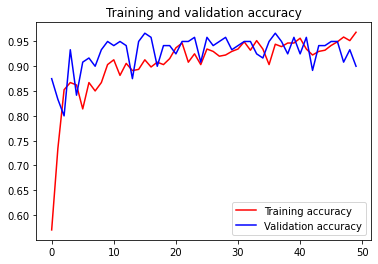

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig = plt.gcf()
fig.savefig('from_LeNet.png',dpi=fig.dpi)
plt.show()



### Save model

In [14]:
model.save('from_LeNet.h5')
model.save_weights('from_LeNet_weights.h5')